## PART 2: Scale-free networks

#### First a couple of questions to make sure that you've actually read the text.

- What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

1. Anomalous Regime (γ = 2) : for γ = 2 the degree of the biggest hub grows linearly with the system size, i.e. kmax ~ N. This forces the network into a hub and spoke configuration in which all nodes are close to each other because they all connect to the same central hub. In this regime the average path length does not depend on N.
2. Ultra-Small World (2 ‹ γ ‹ 3) : in this regime the average distance increases as lnlnN, a significantly slower growth than the lnN derived for random networks. We call networks in this regime ultra-small, as the hubs radically reduce the path length. They do so by linking to a large number of small-degree nodes, creating short distances between them.
3. Critical Point (γ = 3) : This value is of particular theoretical interest, as the second moment of the degree distribution does not diverge any longer. At this critical point the lnN dependence encountered for random networks returns. Yet, the calculations indicate the presence of a double logarithmic correction lnlnN [29, 31], which shrinks the distances compared to a random network of similar size.
4. Small World (γ > 3) : In this regime 〈k2〉 is finite and the average distance follows the small world result derived for random networks. While hubs continue to be present, for γ > 3 they are not sufficiently large and numerous to have a significant impact on the distance between the nodes.

- What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
1. Sublinear Preferential Attachment (0 < α < 1): For any α > 0 new nodes favor the more connected nodes over the less connected nodes. Yet, for α < 1 the bias is weak, not sufficient to generate a scale-free degree distribution.
2. Linear Regime (α=1) : This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.
3. Superlinear Preferential Attachment (α > 1) : For α > 1 the tendency to link to highly connected nodes is enhanced, accelerating the rich-gets-richer process. The consequence of this is most obvious for α > 2, when the model predicts a winner-takes-all phenomenon

#### We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:

First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
Now add another node, connecting one of the existing nodes in proportion to their degree.
Keep going until you have a 100 node network.
Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.
Plot the network.
Add more nodes until you have a 5000 node network.
What's the maximum and minimum degree?
Now, bin the degree distribution using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.

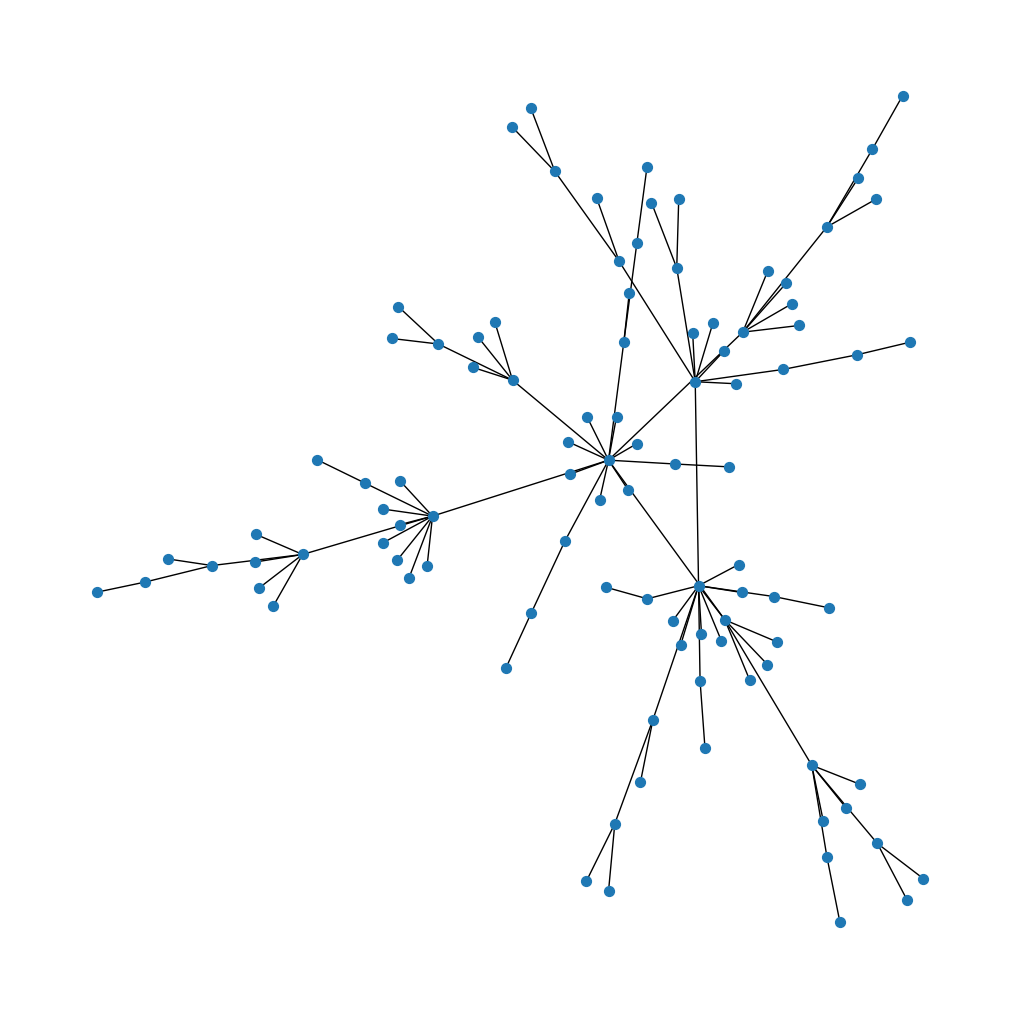

In [ ]:
'''First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
Now add another node, connecting one of the existing nodes in proportion to their degree.
Keep going until you have a 100 node network.
Hint: The difficult part here is connecting to each node according to their degree. 
The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). 
That list contains each node in proportion to its connections, thus drawing a random node from that list 
(e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.

Plot the network.
Add more nodes until you have a 5000 node network.
What's the maximum and minimum degree?
Now, bin the degree distribution using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.'''

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

G = nx.Graph()
G.add_edge(0, 1)

for i in range(2, 100):
    # Create a list of all nodes proportional to their degree 
    # (by flattening the edge list, the node will appear as many times as its degree)
    node_options = np.array(G.edges()).flatten()
    # Select a random node from the list
    new_node = i
    target_node = random.choice(node_options) 
    G.add_edge(new_node, target_node)

plt.figure(figsize=(10, 10))
nx.draw(G, node_size=50)
plt.show()


array([ 0,  1,  0,  2,  0,  3,  0,  5,  0,  8,  0,  9,  0, 10,  0, 15,  0,
       16,  0, 18,  0, 20,  0, 22,  0, 28,  0, 29,  0, 31,  0, 34,  0, 35,
        0, 39,  0, 40,  0, 42,  0, 45,  0, 50,  0, 54,  0, 62,  0, 64,  0,
       66,  0, 74,  0, 75,  0, 83,  0, 96,  1, 11,  2,  4,  2,  6,  2,  7,
        2, 12,  2, 14,  2, 21,  2, 30,  2, 37,  2, 56,  2, 71,  4, 13,  4,
       59,  6, 82,  7, 17,  7, 57,  9, 19,  9, 24,  9, 25,  9, 36,  9, 38,
        9, 44,  9, 58,  9, 85, 11, 27, 11, 33, 12, 23, 12, 41, 12, 69, 14,
       76, 15, 94, 16, 63, 16, 77, 19, 51, 19, 97, 20, 26, 21, 72, 21, 89,
       22, 98, 23, 43, 24, 32, 26, 67, 27, 52, 28, 55, 30, 70, 31, 53, 32,
       47, 36, 90, 37, 61, 37, 68, 37, 73, 38, 88, 39, 48, 39, 78, 40, 49,
       40, 91, 44, 46, 44, 99, 46, 95, 51, 81, 52, 60, 53, 65, 56, 79, 56,
       93, 60, 92, 69, 80, 70, 84, 76, 86, 85, 87])

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (0, 8), (0, 9), (0, 10), (0, 15), (0, 16), (0, 18), (0, 20), (0, 22), (0, 28), (0, 29), (0, 31), (0, 34), (0, 35), (0, 39), (0, 40), (0, 42), (0, 45), (0, 50), (0, 54), (0, 62), (0, 64), (0, 66), (0, 74), (0, 75), (0, 83), (0, 96), (1, 11), (2, 4), (2, 6), (2, 7), (2, 12), (2, 14), (2, 21), (2, 30), (2, 37), (2, 56), (2, 71), (4, 13), (4, 59), (6, 82), (7, 17), (7, 57), (9, 19), (9, 24), (9, 25), (9, 36), (9, 38), (9, 44), (9, 58), (9, 85), (11, 27), (11, 33), (12, 23), (12, 41), (12, 69), (14, 76), (15, 94), (16, 63), (16, 77), (19, 51), (19, 97), (20, 26), (21, 72), (21, 89), (22, 98), (23, 43), (24, 32), (26, 67), (27, 52), (28, 55), (30, 70), (31, 53), (32, 47), (36, 90), (37, 61), (37, 68), (37, 73), (38, 88), (39, 48), (39, 78), (40, 49), (40, 91), (44, 46), (44, 99), (46, 95), (51, 81), (52, 60), (53, 65), (56, 79), (56, 93), (60, 92), (69, 80), (70, 84), (76, 86), (85, 87)])

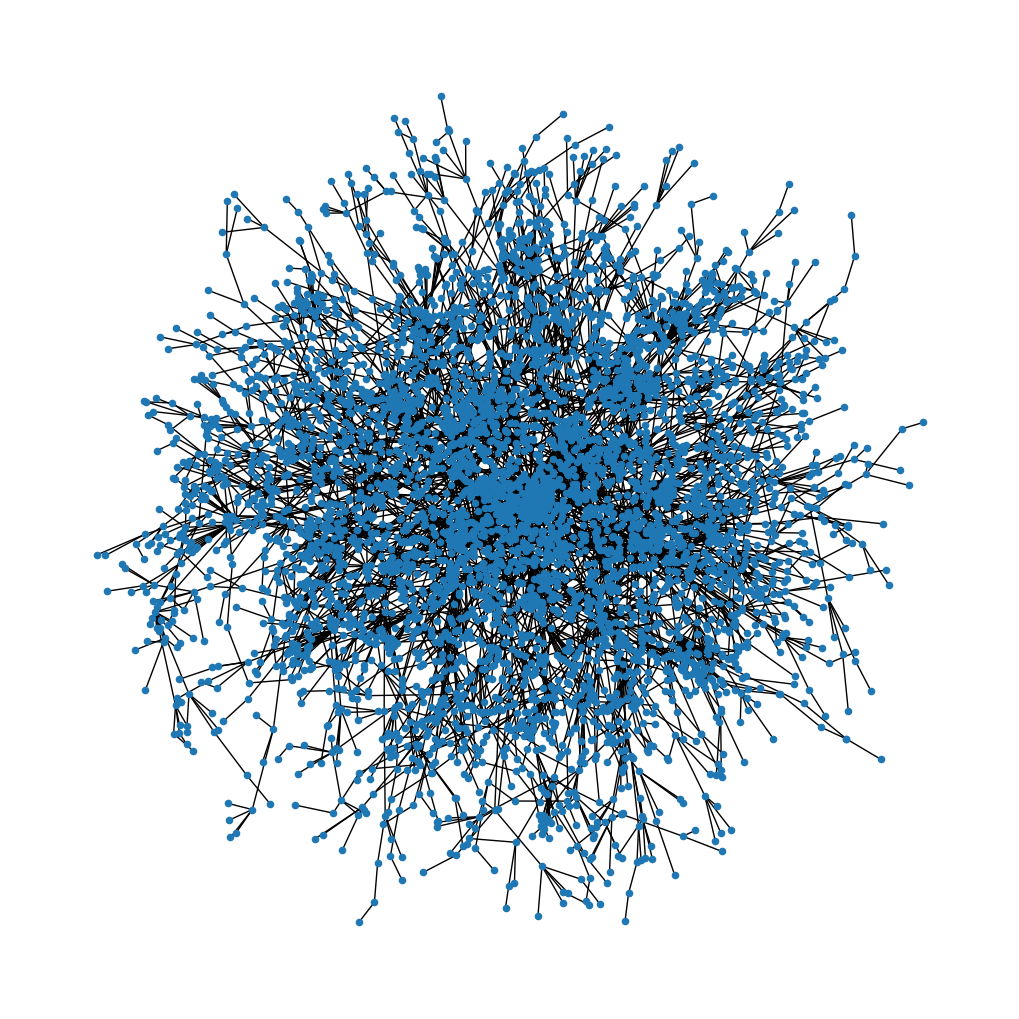

Number of edges: 4999


In [47]:
'''Add more nodes until you have a 5000 node network.
What's the maximum and minimum degree?
Now, bin the degree distribution using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.'''

G_big = nx.Graph()
G_big.add_edge(0, 1)

for i in range(2, 5000):
    # Create a list of all nodes proportional to their degree 
    # (by flattening the edge list, the node will appear as many times as its degree)
    node_options = np.array(G_big.edges()).flatten()
    # Select a random node from the list
    new_node = i
    target_node = random.choice(node_options) 
    G_big.add_edge(new_node, target_node)

plt.figure(figsize=(10, 10))
nx.draw(G_big, node_size=20)
plt.show()

# number of edges 
num_edges = G_big.number_of_edges()
print(f"Number of edges: {num_edges}")
    

Max degree: 122, Min degree: 1


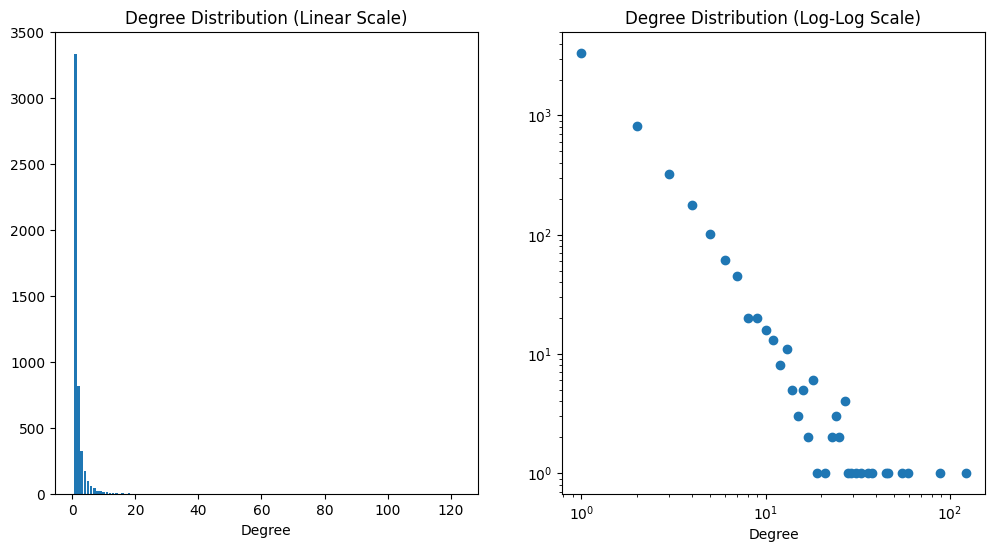

In [ ]:
'''What's the maximum and minimum degree?
Now, bin the degree distribution using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.'''

degrees = [degree for node, degree in G_big.degree()]
max_degree = max(degrees)
min_degree = min(degrees)
print(f"Max degree: {max_degree}, Min degree: {min_degree}")

# Bin the degree distribution
hist, bin_edges = np.histogram(degrees, bins=range(min_degree, (max_degree+1)+1))

# Plot the distribution on linear scale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist, width=0.8, align='center')
plt.title('Degree Distribution (Linear Scale)')
plt.xlabel('Degree')

# Plot the distribution on log-log scale
plt.subplot(1, 2, 2)
plt.loglog(bin_edges[:-1], hist, marker='o', linestyle='None')
plt.title('Degree Distribution (Log-Log Scale)')
plt.xlabel('Degree')
plt.show()



## Part 3: The friendship paradox in scale-free networks

Next step is to explore the Friendship paradox. This paradox states that almost everyone has fewer friends than their friends have, on average*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network F-BA for friendship BA). Do the following:

Exercise. The friendship paradox in BA networks

- Pick a node i at random (e.g. use random.choice). Find its degree.
- Find i's neighbors. And calculate their average degree.
- Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.
- Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

In [13]:
# Pick a node i at random (e.g. use random.choice). Find its degree.
node_i = random.choice(list(G_big.nodes()))
degree_i = G_big.degree(node_i)
print(f"Node {node_i} has degree {degree_i}")

Node 927 has degree 2


In [32]:
# Find neighbors of i and make it a list to calculate its length
neighbors = list(G_big.neighbors(node_i))
num_neighbors = len(neighbors)

# Calculate the average degree of the neighbors
average_neighbor_degree = sum([G_big.degree(n) for n in neighbors]) / num_neighbors
print(f"Average degree of neighbors: {average_neighbor_degree}")
print(f"Friendship paradox holds: {average_neighbor_degree > degree_i}")

Average degree of neighbors: 1.5
Friendship paradox holds: False


In [ ]:
# Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?
count_paradox = 0
num_trials = 1000
for _ in range(num_trials):
    node_i = random.choice(list(G_big.nodes()))
    degree_i = G_big.degree(node_i)
    neighbors = list(G_big.neighbors(node_i))
    if len(neighbors) == 0:
        continue  # Skip if the node has no neighbors
    average_neighbor_degree = sum([G_big.degree(n) for n in neighbors]) / len(neighbors)
    if average_neighbor_degree > degree_i:
        count_paradox += 1

print(f"Friendship paradox held in {count_paradox} out of {num_trials} trials.")

Friendship paradox held in 859 out of 1000 trials.


#### Exercise. The friendship paradox more generally

- What if the power law is flatter, e.g. p(k)∼k^(−γ) with γ=2? Will the fraction of times the paradox is true be higher or lower?

- First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?

Fra teksten:
BA follows a power law distribution with y=3. For γ = 2 the degree of the biggest hub grows linearly with the system size, i.e. kmax ~ N. This forces the network into a hub and spoke configuration (a network design with a central "hub" device that all "spoke" (smaller) devices connect to, facilitating communication between them through the hub) in which all nodes are close to each other because they all connect to the same central hub. In this regime the average path length does not depend on N.

When y is decreased to 2 and hereby the power law flattens, the probability of high k (averge degree) are higher and the probaility of lower k are lower. Hereby, there will be fewer cases where the friendship paradox is true, as more of the chosen nodes will be of higher degree.


- Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the configuation model. The networkx funtion is here nx.configuration_model. I suggest you make the network pretty big ... let's say 5000 nodes or more.
    - Hint 0: In the networkx function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number r uniformly distributed in the range 0≤r<1, then x=xmin(1–r)−1/α−1 is a random power-law-distributed real number in the range xmin≤x<∞ with exponent α. Note that there has to be a lower limit xmin on the range; the power-law distribution diverges as x→0. See section 2 this paper for more details (especially the ‡ footnote).
    - Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
    - Hint 2: Also, due to some details of how the configuation works (see the wiki page for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.

- Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?


In [ ]:
random.seed(1234)

'''- Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the configuation model. The networkx funtion is here nx.configuration_model. I suggest you make the network pretty big ... let's say 5000 nodes or more.
    - Hint 0: In the networkx function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number r uniformly distributed in the range 0≤r<1, then x=xmin(1–r)−1/α−1 is a random power-law-distributed real number in the range xmin≤x<∞ with exponent α. Note that there has to be a lower limit xmin on the range; the power-law distribution diverges as x→0. See section 2 this paper for more details (especially the ‡ footnote).
    - Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
    - Hint 2: Also, due to some details of how the configuation works (see the wiki page for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
'''

r = np.random.uniform(0, 1, 5000)
xmin = 1 # min en connection per node 
gamma = 2 # slope


x = xmin * (1 - r) ** (-1 / (gamma - 1)) # mapper/manipulerer den uniforme fordeling til en power-law fordeling
x_rounded = [int(round(xi)) for xi in x]
if sum(x_rounded) % 2 != 0: # check if the sum is odd
    x_rounded[0] += 1 # if odd, add 1 to the first element to make it even

G_flat = nx.configuration_model(x_rounded)

# CHAT GPT: The configuration model can create parallel edges and self-loops, which may not be desired in a simple graph. 
# To convert it to a simple graph, we can use the following approach:
G_flat = nx.Graph(G_flat) # remove parallel edges
G_flat.remove_edges_from(nx.selfloop_edges(G_flat)) # remove self-loops
print(f"Generated a graph with {G_flat.number_of_nodes()} nodes and {G_flat.number_of_edges()} edges.") 

# Friendship paradox in the new network
count_paradox_flat = 0
num_trials_flat = 1000
for _ in range(num_trials_flat):
    node_i = random.choice(list(G_flat.nodes()))
    degree_i = G_flat.degree(node_i)
    neighbors = list(G_flat.neighbors(node_i))
    if len(neighbors) == 0:
        continue  # Skip if the node has no neighbors
    average_neighbor_degree = sum([G_flat.degree(n) for n in neighbors]) / len(neighbors)
    if average_neighbor_degree > degree_i:
        count_paradox_flat += 1

print(f"Friendship paradox held in {count_paradox_flat} out of {num_trials_flat} trials in the new network.")


Generated a graph with 5000 nodes and 16193 edges.
Friendship paradox held in 971 out of 1000 trials in the new network.


#### Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

NO, der er nu endnu større andel af noder, hvor friendship paradox is true. Dvs. de flere større hubs og den store central hub, presser gennemsnittet op for average connections. 

#### Exercise. The friendship paradox and the configuration model

Now generate a network for the configuration model that has the same slope and number of nodes as F-BA* in A above; let's call this new network F-CM* (for friendship configuration model).
What fraction of the time is the friendship paradox is true for the F-CM network?
Assuming that F-BA and F-CM have the same degree sequence can now think about if F-BA and F-CM are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

In [ ]:
'''Now generate a network for the configuration model that has the same slope and number of nodes as F-BA* in A above; let's call this new network F-CM* (for friendship configuration model).
What fraction of the time is the friendship paradox is true for the F-CM network?
Assuming that F-BA and F-CM have the same degree sequence can now think about if F-BA and F-CM are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)'''

r = np.random.uniform(0, 1, 5000)
xmin = 1 # min en connection per node 
gamma = 3 # slope


x = xmin * (1 - r) ** (-1 / (gamma - 1)) # mapper/manipulerer den uniforme fordeling til en power-law fordeling
x_rounded = [int(round(xi)) for xi in x]
if sum(x_rounded) % 2 != 0: # check if the sum is odd
    x_rounded[0] += 1 # if odd, add 1 to the first element to make it even

G_CM = nx.configuration_model(x_rounded)

# CHAT GPT: The configuration model can create parallel edges and self-loops, which may not be desired in a simple graph. 
# To convert it to a simple graph, we can use the following approach:
G_CM = nx.Graph(G_CM) # remove parallel edges
G_CM.remove_edges_from(nx.selfloop_edges(G_CM)) # remove self-loops
print(f"Generated a graph with {G_CM.number_of_nodes()} nodes and {G_CM.number_of_edges()} edges.") 

# Friendship paradox in the new network
count_paradox_CM = 0
num_trials_CM = 1000
for _ in range(num_trials_CM):
    node_i = random.choice(list(G_CM.nodes()))
    degree_i = G_CM.degree(node_i)
    neighbors = list(G_CM.neighbors(node_i))
    if len(neighbors) == 0:
        continue  # Skip if the node has no neighbors
    average_neighbor_degree = sum([G_CM.degree(n) for n in neighbors]) / len(neighbors)
    if average_neighbor_degree > degree_i:
        count_paradox_CM += 1

print(f"Friendship paradox held in {count_paradox_CM} out of {num_trials_CM} trials in the F-CM network.")

Generated a graph with 5000 nodes and 4683 edges.
Friendship paradox held in 605 out of 1000 trials in the F-CM network.
